In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Load Data
def load_data(file_path):
    return pd.read_csv(file_path)

file_path = 'data.csv'
data = load_data(file_path)
print("Data Loaded Successfully!")


Data Loaded Successfully!



Exploratory Data Analysis
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB
None


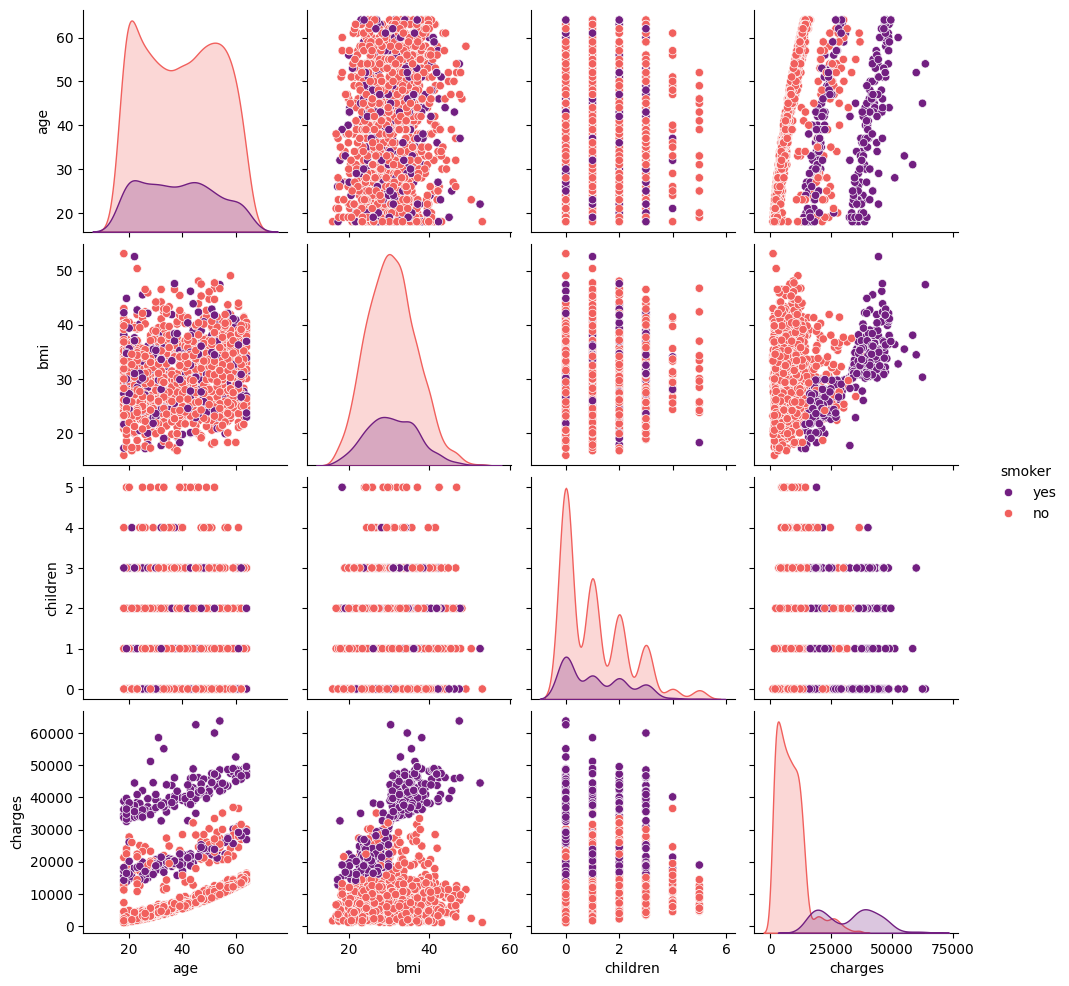

In [ ]:
# Perform EDA
def perform_eda(data):
    """Perform exploratory data analysis."""
    print(data.head())
    print(data.info())
    sns.pairplot(data, hue='smoker', palette='magma')
    plt.show()

print("\nExploratory Data Analysis")
perform_eda(data)

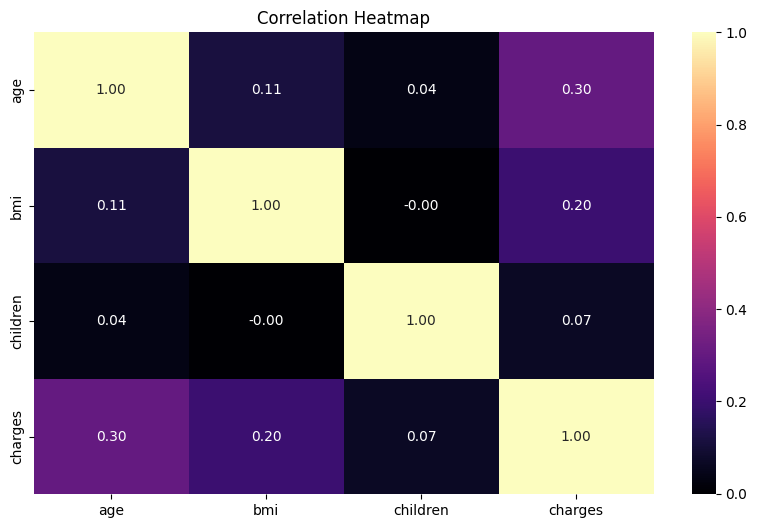

In [ ]:
# Plot Correlation Heatmap
def plot_correlation(data):
    """Plot a heatmap of correlations."""
    numeric_data = data.select_dtypes(include=[np.number])
    plt.figure(figsize=(10, 6))
    sns.heatmap(numeric_data.corr(), annot=True, cmap='magma', fmt='.2f')
    plt.title('Correlation Heatmap')
    plt.show()
plot_correlation(data)


In [ ]:
# Preprocess Data
def preprocess_data(data):
    """Preprocess the dataset: handle categorical and numerical data."""
    # One-hot encode categorical variables
    data = pd.get_dummies(data, columns=['sex', 'smoker', 'region'], drop_first=True)
    X = data.drop(columns=['charges'])
    y = data['charges']  # Target variable
    # Scale the numerical features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    return train_test_split(X_scaled, y, test_size=0.2, random_state=42), data.columns.drop(['charges'])

(X_train, X_test, y_train, y_test), feature_names = preprocess_data(data)
print("Data Preprocessing Completed Successfully!")


Data Preprocessing Completed Successfully!


In [ ]:
# Train and Evaluate Model
def train_and_evaluate(model, X_train, y_train, X_test, y_test):
    """Train and evaluate the model."""
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    return predictions, mse, r2


In [ ]:
# Cell 7: Linear Regression
print("\nTraining Linear Regression Model")
linear_model = LinearRegression()
predictions, mse, r2 = train_and_evaluate(linear_model, X_train, y_train, X_test, y_test)
cv_score = cross_val_score(linear_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
linear_results = {
    'Model': 'Linear Regression',
    'MSE': mse,
    'R² Score': r2,
    'Cross-Validated RMSE': np.sqrt(-cv_score.mean())
}
print("Linear Regression Results:", linear_results)



Training Linear Regression Model
Linear Regression Results: {'Model': 'Linear Regression', 'MSE': 39933194.54805148, 'R² Score': 0.73981661775643, 'Cross-Validated RMSE': 6022.930583446382}


In [ ]:
# Cell 8: Elastic Net
print("\nTraining Elastic Net Model")
param_grid = {
    'alpha': [0.01, 0.1, 1, 10],
    'l1_ratio': [0.2, 0.5, 0.8]
}
grid_search = GridSearchCV(ElasticNet(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)
elastic_model = grid_search.best_estimator_
predictions, mse, r2 = train_and_evaluate(elastic_model, X_train, y_train, X_test, y_test)
cv_score = cross_val_score(elastic_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
elastic_results = {
    'Model': 'Elastic Net',
    'MSE': mse,
    'R² Score': r2,
    'Cross-Validated RMSE': np.sqrt(-cv_score.mean())
}
print("Elastic Net Results:", elastic_results)


Training Elastic Net Model
Elastic Net Results: {'Model': 'Elastic Net', 'MSE': 39942893.23748929, 'R² Score': 0.7397534262725074, 'Cross-Validated RMSE': 6022.853399364079}


In [ ]:
# Cell 9: Ridge Regression
print("\nTraining Ridge Regression Model")
ridge_param_grid = {'alpha': [0.1, 1, 10, 100]}
grid_search = GridSearchCV(Ridge(random_state=42), ridge_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)
ridge_model = grid_search.best_estimator_
predictions, mse, r2 = train_and_evaluate(ridge_model, X_train, y_train, X_test, y_test)
cv_score = cross_val_score(ridge_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
ridge_results = {
    'Model': 'Ridge Regression',
    'MSE': mse,
    'R² Score': r2,
    'Cross-Validated RMSE': np.sqrt(-cv_score.mean())
}
print("Ridge Regression Results:", ridge_results)


Training Ridge Regression Model
Ridge Regression Results: {'Model': 'Ridge Regression', 'MSE': 39935303.88440314, 'R² Score': 0.7398028744465728, 'Cross-Validated RMSE': 6022.901203422756}


In [ ]:
# Cell 10: Lasso Regression
print("\nTraining Lasso Regression Model")
lasso_param_grid = {'alpha': [0.01, 0.1, 1, 10]}
grid_search = GridSearchCV(Lasso(random_state=42), lasso_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)
lasso_model = grid_search.best_estimator_
predictions, mse, r2 = train_and_evaluate(lasso_model, X_train, y_train, X_test, y_test)
cv_score = cross_val_score(lasso_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
lasso_results = {
    'Model': 'Lasso Regression',
    'MSE': mse,
    'R² Score': r2,
    'Cross-Validated RMSE': np.sqrt(-cv_score.mean())
}
print("Lasso Regression Results:", lasso_results)



Training Lasso Regression Model
Lasso Regression Results: {'Model': 'Lasso Regression', 'MSE': 39941268.4180113, 'R² Score': 0.7397640127290157, 'Cross-Validated RMSE': 6022.676369301219}


In [ ]:

# Cell 11: Support Vector Regression
print("\nTraining Support Vector Regression Model")
svr_param_grid = {'C': [0.1, 1, 10], 'epsilon': [0.1, 0.2, 0.5]}
grid_search = GridSearchCV(SVR(kernel='linear'), svr_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)
svr_model = grid_search.best_estimator_
predictions, mse, r2 = train_and_evaluate(svr_model, X_train, y_train, X_test, y_test)
cv_score = cross_val_score(svr_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
svr_results = {
    'Model': 'Support Vector Regression',
    'MSE': mse,
    'R² Score': r2,
    'Cross-Validated RMSE': np.sqrt(-cv_score.mean())
}
print("Support Vector Regression Results:", svr_results)



Training Support Vector Regression Model
Support Vector Regression Results: {'Model': 'Support Vector Regression', 'MSE': 70432007.3941631, 'R² Score': 0.5411026312967075, 'Cross-Validated RMSE': 8177.438237284184}


In [ ]:
# Cell 12: Random Forest Regression
print("\nTraining Random Forest Regression Model")
rf_param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30]}
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), rf_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)
rf_model = grid_search.best_estimator_
predictions, mse, r2 = train_and_evaluate(rf_model, X_train, y_train, X_test, y_test)
cv_score = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
rf_results = {
    'Model': 'Random Forest Regression',
    'MSE': mse,
    'R² Score': r2,
    'Cross-Validated RMSE': np.sqrt(-cv_score.mean())
}
print("Random Forest Regression Results:", rf_results)


Training Random Forest Regression Model
Random Forest Regression Results: {'Model': 'Random Forest Regression', 'MSE': 7623985.896590926, 'R² Score': 0.9503261770263483, 'Cross-Validated RMSE': 3218.624116427808}


In [ ]:
# Cell 13: Display and Plot Results
results = [linear_results, elastic_results, ridge_results, lasso_results, svr_results, rf_results]
results_df = pd.DataFrame(results)
print("\nUpdated Model Performance Summary:")
print(results_df)


Updated Model Performance Summary:
                       Model           MSE  R² Score  Cross-Validated RMSE
0          Linear Regression  3.993319e+07  0.739817           6022.930583
1                Elastic Net  3.994289e+07  0.739753           6022.853399
2           Ridge Regression  3.993530e+07  0.739803           6022.901203
3           Lasso Regression  3.994127e+07  0.739764           6022.676369
4  Support Vector Regression  7.043201e+07  0.541103           8177.438237
5   Random Forest Regression  7.623986e+06  0.950326           3218.624116


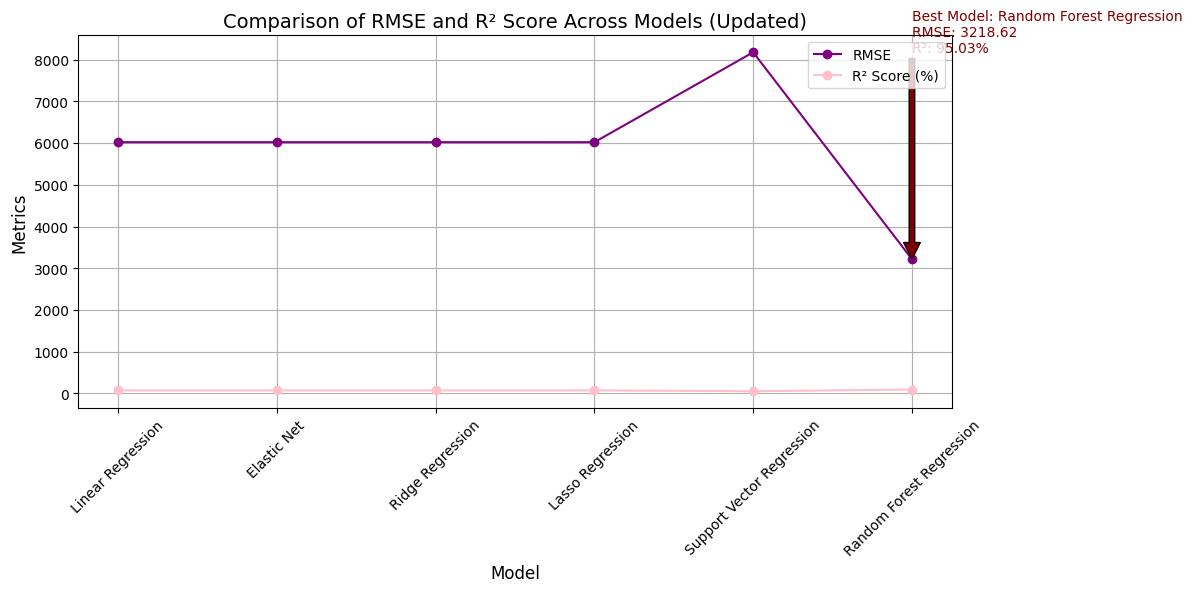

In [ ]:
# Corrected Re-plot to Use RMSE Directly
plt.figure(figsize=(12, 6))

# Use RMSE directly for plotting
rmse_values = [result['Cross-Validated RMSE'] for result in results]
r2_percentage = [result['R² Score'] * 100 for result in results]

# Plot RMSE and R² Score
plt.plot(results_df['Model'], rmse_values, marker='o', label='RMSE', color='purple')
plt.plot(results_df['Model'], r2_percentage, marker='o', label='R² Score (%)', color='pink')

# Adjust titles and labels
plt.title('Comparison of RMSE and R² Score Across Models (Updated)', fontsize=14)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Metrics', fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

# Highlight the best model
best_idx = np.argmin(rmse_values)
best_model_name = results_df.iloc[best_idx]['Model']
best_rmse = rmse_values[best_idx]
best_r2 = r2_percentage[best_idx]

plt.annotate(
    f'Best Model: {best_model_name}\nRMSE: {best_rmse:.2f}\nR²: {best_r2:.2f}%',
    xy=(best_idx, best_rmse),
    xytext=(best_idx, max(rmse_values) - 10),
    arrowprops=dict(facecolor='maroon'),
    fontsize=10,
    color='maroon'
)

plt.tight_layout()
plt.show()

In [ ]:
# Generate Performance Table
performance_table = results_df.copy()
performance_table['R² Score (%)'] = performance_table['R² Score'] * 100
performance_table = performance_table.rename(columns={
    'MSE': 'Mean Squared Error',
    'Cross-Validated RMSE': 'Root Mean Squared Error',
    'R² Score (%)': 'R² Score (%)'
})

# Display the table
print("\nModel Performance Table:")
print(performance_table)

# Optional: Display the table in a styled format (if needed)
try:
    from IPython.display import display
    display(performance_table.style.set_caption("Model Performance Table").format({
        'Mean Squared Error': "{:.2e}",
        'Root Mean Squared Error': "{:.2f}",
        'R² Score (%)': "{:.2f}"
    }))
except ImportError:
    pass



Model Performance Table:
                       Model  Mean Squared Error  R² Score  \
0          Linear Regression        3.993319e+07  0.739817   
1                Elastic Net        3.994289e+07  0.739753   
2           Ridge Regression        3.993530e+07  0.739803   
3           Lasso Regression        3.994127e+07  0.739764   
4  Support Vector Regression        7.043201e+07  0.541103   
5   Random Forest Regression        7.623986e+06  0.950326   

   Root Mean Squared Error  R² Score (%)  
0              6022.930583     73.981662  
1              6022.853399     73.975343  
2              6022.901203     73.980287  
3              6022.676369     73.976401  
4              8177.438237     54.110263  
5              3218.624116     95.032618  


,Model,Mean Squared Error,R² Score,Root Mean Squared Error,R² Score (%)
0,Linear Regression,3.99e+07,0.739817,6022.93,73.98
1,Elastic Net,3.99e+07,0.739753,6022.85,73.98
2,Ridge Regression,3.99e+07,0.739803,6022.90,73.98
3,Lasso Regression,3.99e+07,0.739764,6022.68,73.98
4,Support Vector Regression,7.04e+07,0.541103,8177.44,54.11
5,Random Forest Regression,7.62e+06,0.950326,3218.62,95.03
